<a href="https://colab.research.google.com/github/Samyakjain03112001/Fitness_company_EDA_prob_n_stats/blob/main/Fitness_company_stats_n_prob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Fitness company Business case**

**Problem Statement**

The Market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers

This EDA will help to indentify the characteristics of the customer on there purchaces and give some insighs based on customer profile

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm

#Import the data, checking the shape, type of attibutes, missing values, and summary

In [3]:
nf=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749")

In [4]:
nf.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
nf.shape

(180, 9)

In [6]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


There is no missing values in the data.

#**Non-Graphical analysis**

In [7]:
nf.value_counts()

Product  Age  Gender  Education  MaritalStatus  Usage  Fitness  Income  Miles
KP281    18   Male    14         Single         3      4        29562   112      1
KP481    30   Female  13         Single         4      3        46617   106      1
         31   Female  16         Partnered      2      3        51165   64       1
                      18         Single         2      1        65220   21       1
              Male    16         Partnered      3      3        52302   95       1
                                                                                ..
KP281    34   Female  16         Single         2      2        52302   66       1
              Male    16         Single         4      5        51165   169      1
         35   Female  16         Partnered      3      3        60261   94       1
                      18         Single         3      3        67083   85       1
KP781    48   Male    18         Partnered      4      5        95508   180      1
Length: 1

In [8]:
nf.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [9]:
nf["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

There are three unique product 'KP281', 'KP481', 'KP781' where KP281 is entry-level, KP481 is itermediate and KP781 is most advanced

#**Visual analysis**

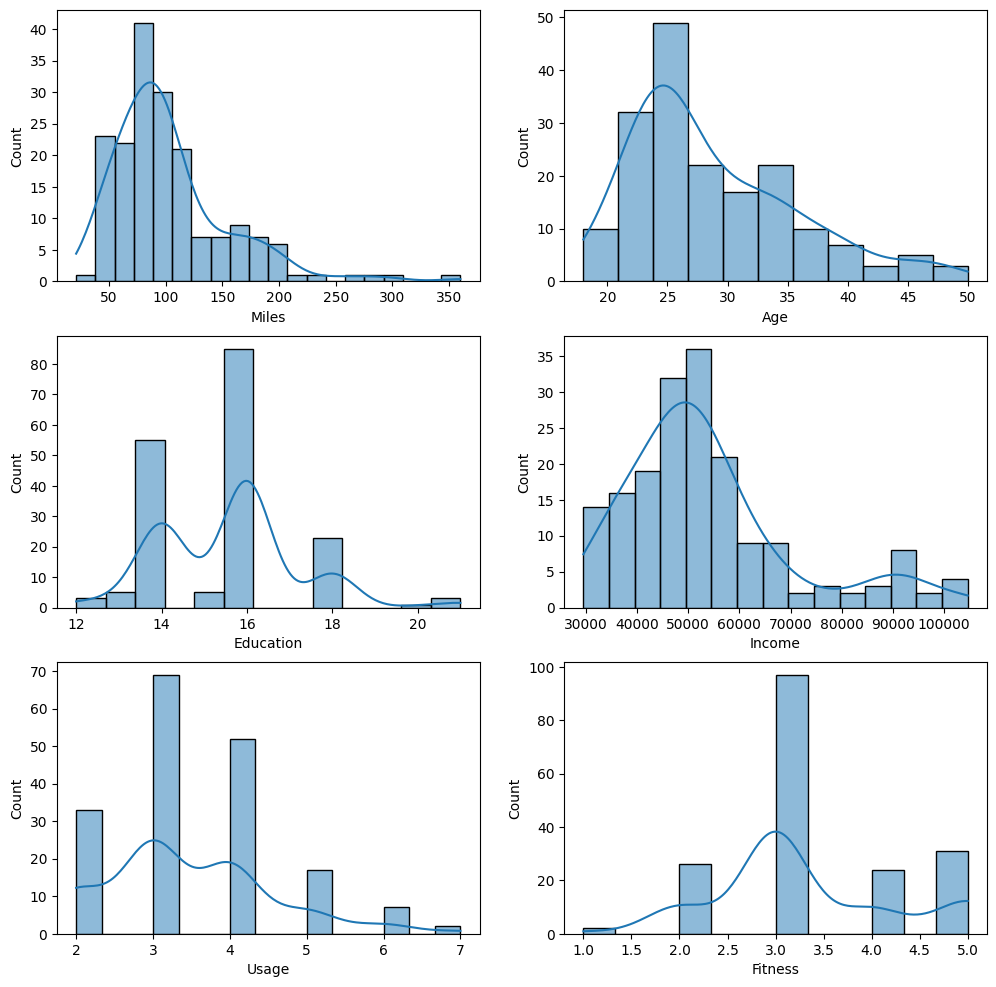

In [10]:
fig, axis = plt.subplots(nrows=3, ncols=2,figsize=(12,12))

sns.histplot(data=nf,x="Miles", kde=True,ax=axis[0,0])
sns.histplot(data=nf,x="Age", kde=True,ax=axis[0,1])
sns.histplot(data=nf,x="Education", kde=True,ax=axis[1,0])
sns.histplot(data=nf,x="Income", kde=True,ax=axis[1,1])
sns.histplot(data=nf,x="Usage", kde=True,ax=axis[2,0])
sns.histplot(data=nf,x="Fitness", kde=True,ax=axis[2,1])
plt.show()

Majority of the product is purchased in the age group of 24 to 32

Majority of the people having total education of 16 years are buying this product

People mostly use this product three days in a week

According to the data average fitness rating of the people is 3

**Outlier detection using boxplot**

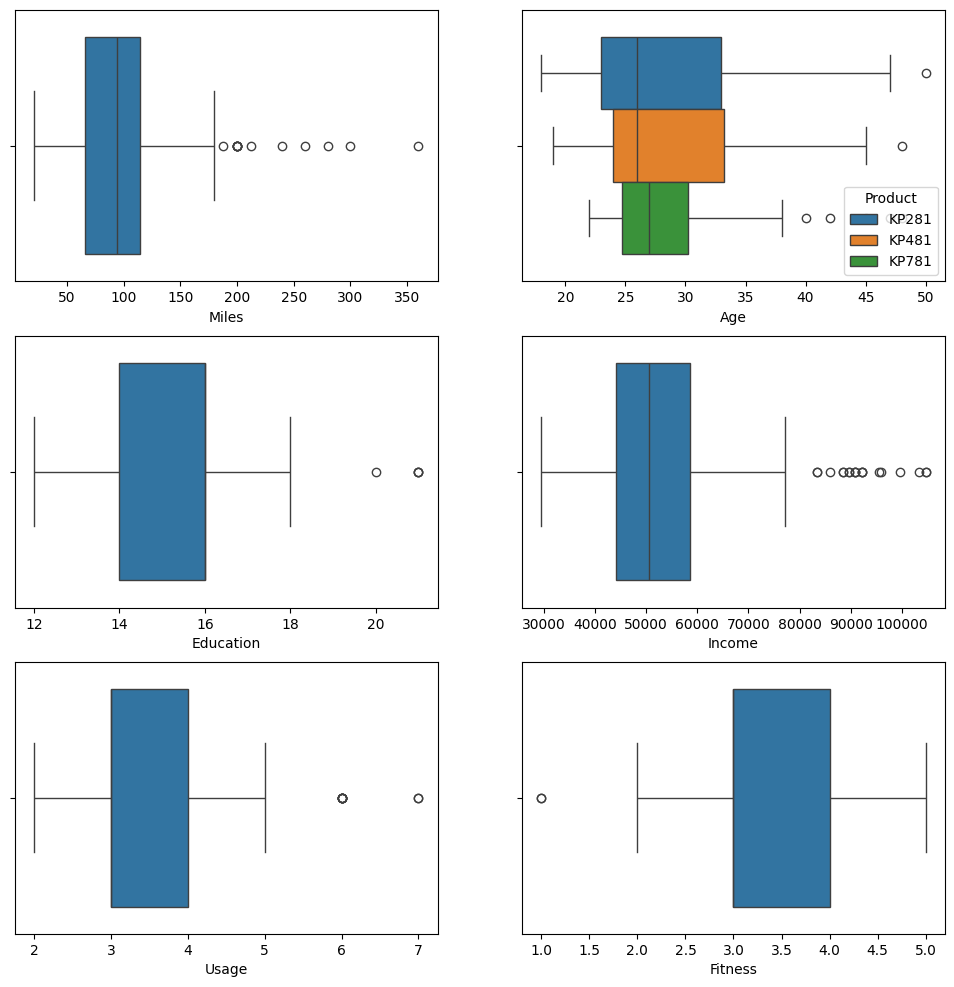

In [11]:
fig, axis = plt.subplots(nrows=3, ncols=2,figsize=(12,12))

sns.boxplot(data=nf,x="Miles",ax=axis[0,0])
sns.boxplot(data=nf,x="Age",hue="Product", ax=axis[0,1])
sns.boxplot(data=nf,x="Education",ax=axis[1,0])
sns.boxplot(data=nf,x="Income",ax=axis[1,1])
sns.boxplot(data=nf,x="Usage",ax=axis[2,0])
sns.boxplot(data=nf,x="Fitness",ax=axis[2,1])
plt.show()

Income and Miles have most of outliers rest all data has minimum outliers


**Countplots**

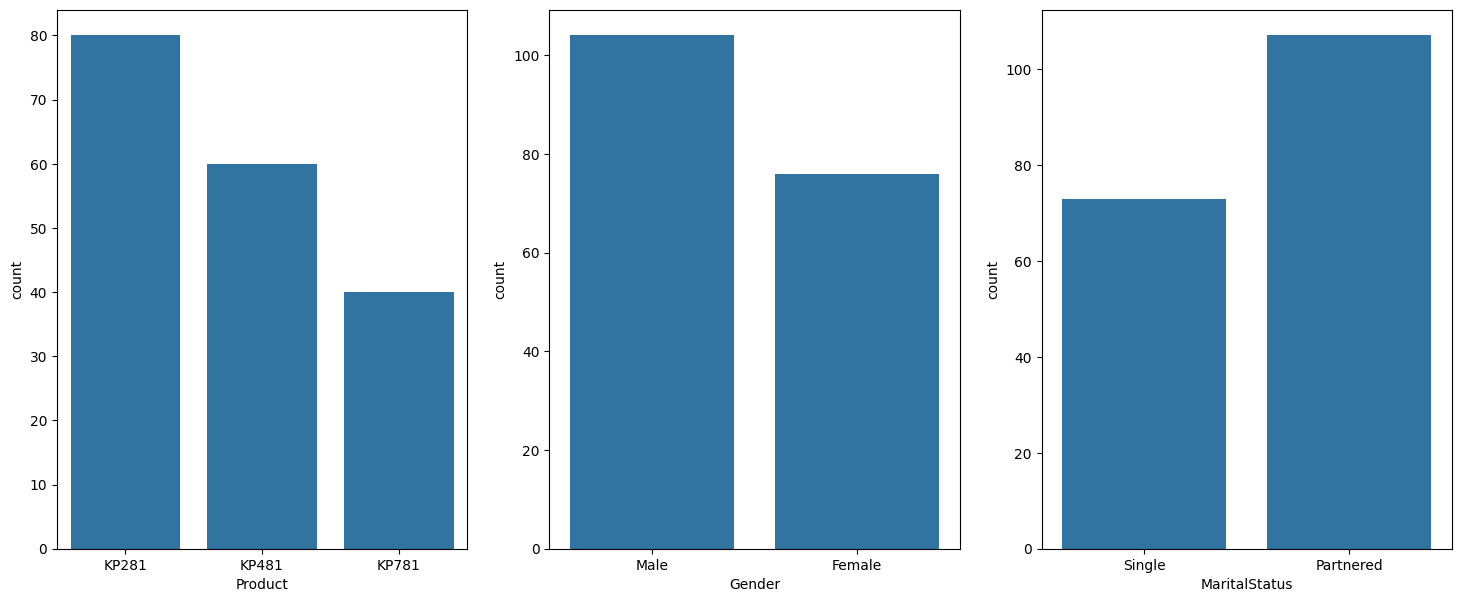

In [12]:
fig, axis = plt.subplots(nrows=1, ncols=3,figsize=(18,7))

sns.countplot(data=nf,x="Product",ax=axis[0])
sns.countplot(data=nf,x="Gender", ax=axis[1])
sns.countplot(data=nf,x="MaritalStatus",ax=axis[2])
plt.show()

* KP281 is the most purchased product.
* Thare are more males buying the product over females.
* More Partnered persons are there in the data.

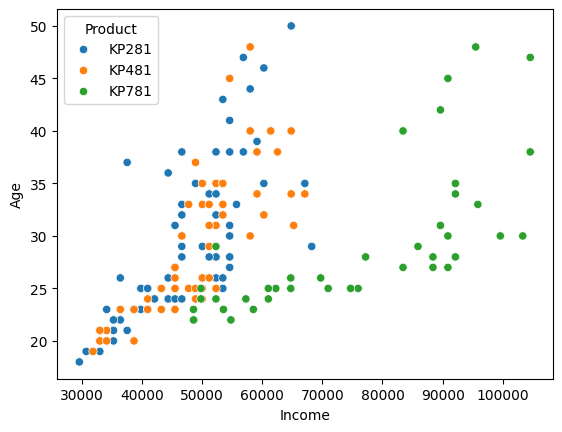

In [13]:
sns.scatterplot(x=nf["Income"], y=nf["Age"], hue=nf["Product"])
plt.show()

majority of the data lies 22 to 30 age group and 40000 to 55000 income


<Axes: xlabel='Product', ylabel='Education'>

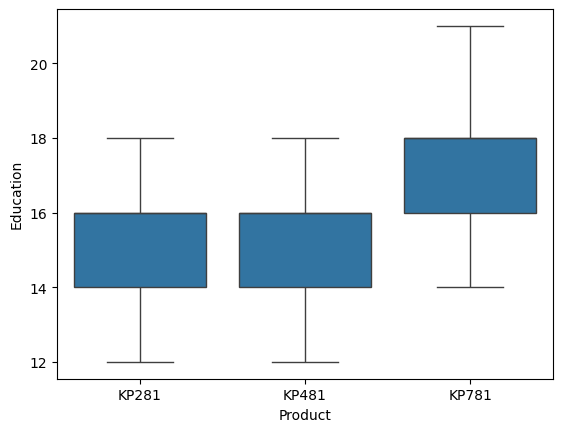

In [14]:
sns.boxplot(x=nf["Product"], y=nf["Education"])

People with education above 16 tends to buy KP781

<Axes: xlabel='Product', ylabel='Miles'>

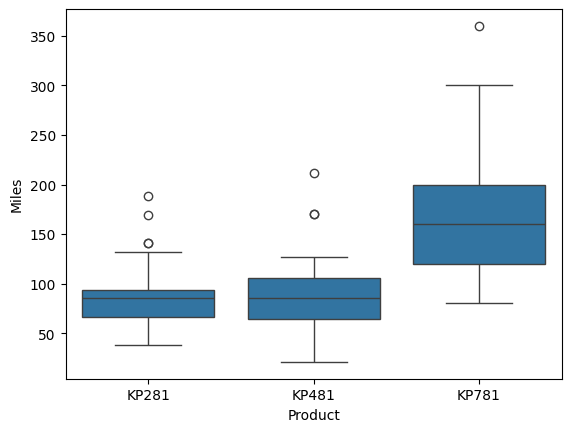

In [16]:
sns.boxplot(x=nf["Product"], y=nf["Miles"])

People running or walking over 120 miles per week are using KP781


<Axes: xlabel='Product', ylabel='Fitness'>

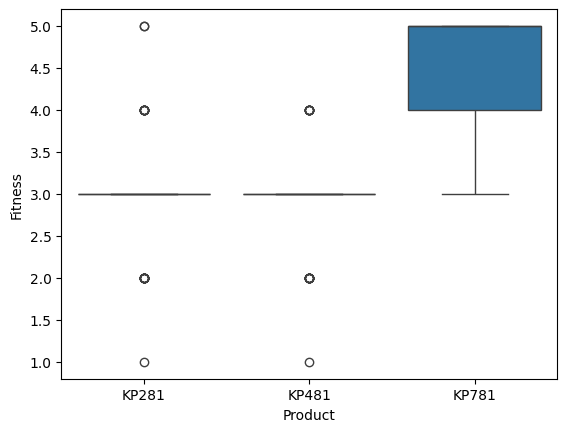

In [17]:
sns.boxplot(x=nf["Product"], y=nf["Fitness"])

People with fitness more then 4 are using KP781

<Axes: xlabel='Product', ylabel='Usage'>

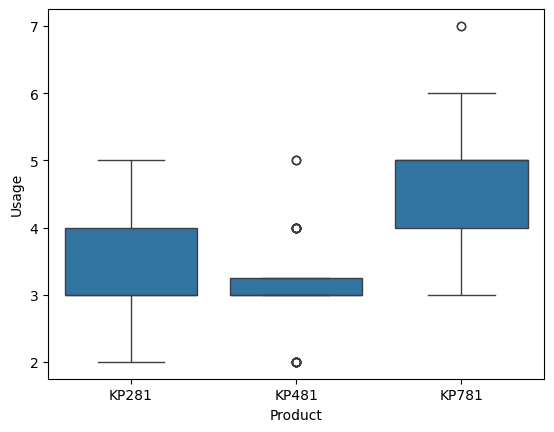

In [18]:
sns.boxplot(x=nf["Product"], y=nf["Usage"])

People who are using the product more then 4 days a week have highest possibility that the product is KP781

**Pairplot**

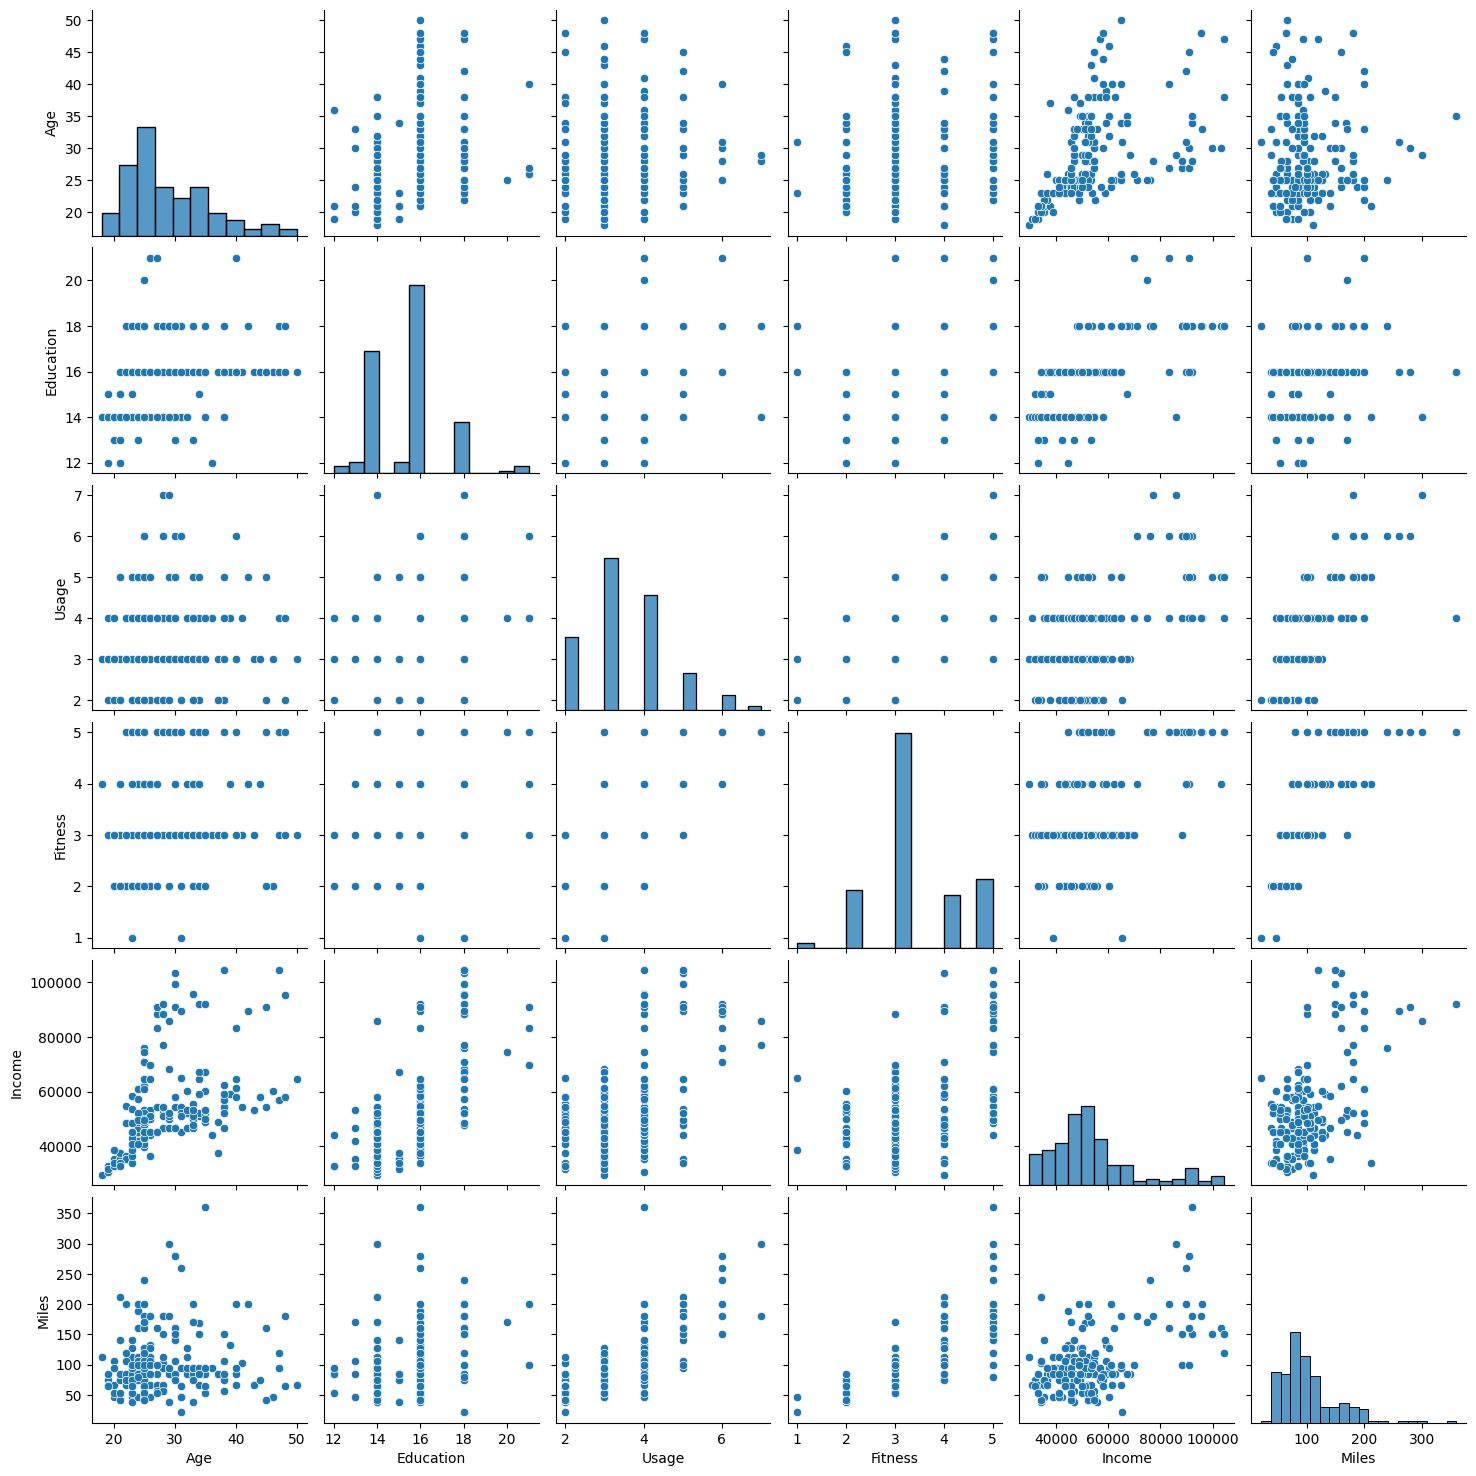

In [19]:
sns.pairplot(data=nf)
plt.show()

**Heatmap and Co-relation**

In [20]:
nf.corr()

<ipython-input-20-8aedc4229763>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  nf.corr()


,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<ipython-input-21-9b029922b9dd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(nf.corr(), annot=True)


<Axes: >

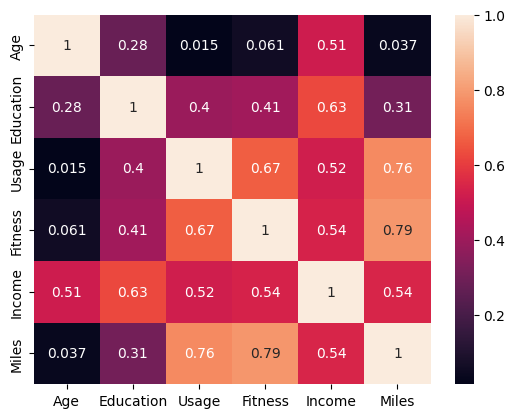

In [21]:
sns.heatmap(nf.corr(), annot=True)

As you can see in the Heatmap There is **highest corelation** between:

* Fitness and Miles (higher the miles more the fitness)

* Usage and Miles (higher the miles more of usage)

* Fitness and Usage (higher the usage more of fitness)

* Income and Education (higher the Education more of Income)

Also we can se **less corelation** between:

* Age and Usage

* Age and Miles

* Age and Fitness (As the age increase there is very less growth in Usage, miles and Fitness)

**Two-way contigency table and heatmap**

<Axes: xlabel='Usage', ylabel='Product'>

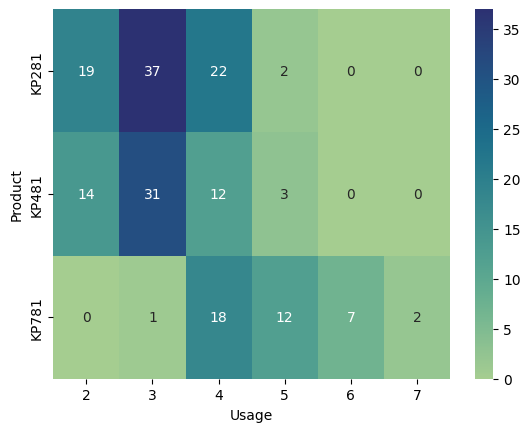

In [22]:
sns.heatmap(pd.crosstab(nf['Product'],nf['Usage'] ),annot=True, cmap="crest")

In [23]:
pd.crosstab(nf['Product'],nf['Fitness'], margins=True)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


<Axes: xlabel='Fitness', ylabel='Product'>

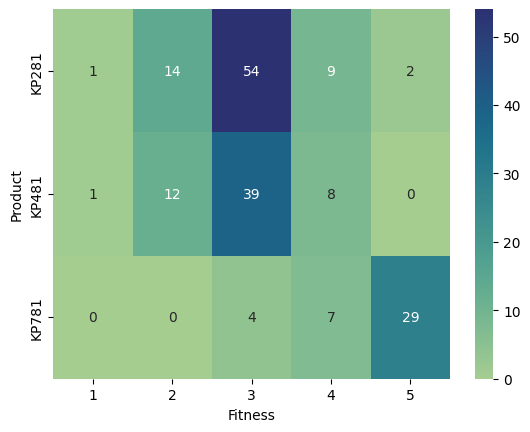

In [24]:
sns.heatmap(pd.crosstab(nf['Product'],nf['Fitness'] ),annot=True, cmap="crest")

Conditional probability: Out of 40 people using KP781 29 people claims to have highest fitness 5 (i.e. Probablity of fitness 5 given the product is KP781 is 29/40=0.725)

In [25]:
pd.crosstab(nf['Product'],nf['Gender'], margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


Conditional probability: Out of 40 people using KP781 33 people are males (i.e. Probablity of males given the product is KP781 is 33/40=0.825)

In [26]:
nf1=nf[["Product", "Gender","MaritalStatus"]].melt()
print(nf1.groupby(["variable","value"])["value"].count()/nf.shape[0])

variable       value    
Gender         Female       0.422222
               Male         0.577778
MaritalStatus  Partnered    0.594444
               Single       0.405556
Product        KP281        0.444444
               KP481        0.333333
               KP781        0.222222
Name: value, dtype: float64


**Marginal Probability**

57.78% of the people are male user

59.44% of the people are Partnered

44.44% uses KP281

33.33% uses KP481

22.22% uses KP781

#**Business Insightes**
* There are three unique product 'KP281', 'KP481', 'KP781' where KP281 is entry-level, KP481 is itermediate and KP781 is most advanced
* Majority of the product is purchased in the age group of 24 to 32
* Majority of the people having total education of 16 years are buying this product
* People mostly use this product three days in a week
* According to the data average fitness rating of the people is 3
* KP281 is the most purchased product (44.44% uses KP281).
* Thare are more males buying the product over females (57.78% of the people are male user).
* More Partnered persons are there in the data (59.44% of the people are Partnered).
* Majority of the data lies 22 to 30 age group and 40000 to 55000 income.
* People with education above 16 tends to buy KP781
* People running or walking over 120 miles per week are using KP781
* People with fitness more then 4 are using KP781
* People who are using the product more then 4 days a week have highest possibility that the product is KP781

#**Business Recommendations**
* Aerofit can target age group of 24 to 32 which are more enthusiastic buyers of fitness product.
* According to the data Partnered people are more likely to buy this product, so company can run a campaign to attract more single people
* Aerofit can also sell or tieup with fitness watches, which will collect data, and target that people who walks or runs more than 120 miles per week
* Aerofit can target people with Income above 55000, who will serve easy costumer for KP781
* Data also shows that people with education in years above 16, tends to buy KP781
* Aerofit can target People who exercise more then 4 days a week, who are more likely to buy advance feature products(KP781)
* People who are using KP481 and have Income above 50000 can be recommend to upgrage to KP781.
* As Partnered people more likely buys this product, Aerofit can also sell couple or family oriented fitness products such as fitness watches, Air purifier, Sleep monitor, etc.
* Aerofit can provide attractive offers or discounts to female customers